In [1]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

# Para clustering
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import statistics
from statistics import mode

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### Clustering

 2. Considere los datasetets p7-data1.csv y p7-data2.csv de datos arti cialmente generados.

 (a) Abra cada dataset en Python y genere un diagrama de dispersion (scatter plot) para cada
 uno.

 (b) Analizando los gra cos a mano considere cuantos clusters estan presentes.
 
 (c) Pruebe ejecutar el comando KMeans con la cantidad de clusters que detecto. Analizar el
 comportamiento del procedimiento en cada caso.

In [2]:
Dir = "/Users/Usuario/Documents/EXACTAS/DATOS/2do Año/Labo de Datos/LDD/DATASETS LDD/"

In [3]:
data1 = pd.read_csv(Dir + 'p7-data1.csv')
data1.head()

,x,y
0,1.765881,-8.314427
1,6.483456,-3.332369
2,-8.480197,0.067655
3,4.706642,7.349470
4,4.502446,-8.135970


In [4]:
data2 = pd.read_csv(Dir + 'p7-data2.csv')
data2.head()

,x,y
0,9.319049,6.406236
1,2.752240,5.609928
2,8.469910,17.636237
3,8.701497,3.632456
4,7.858546,10.899268


DATA1

c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


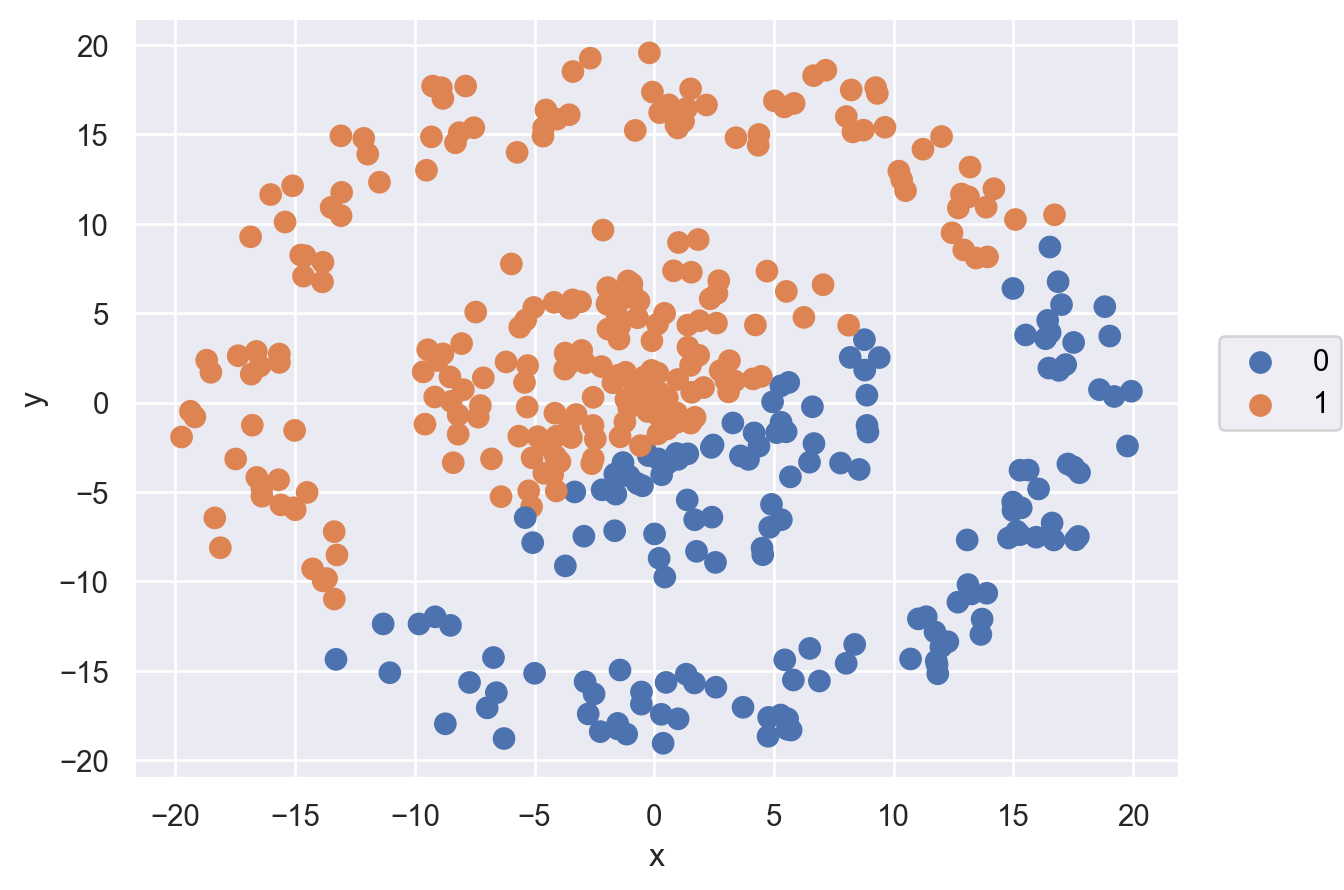

In [5]:
kmeans = KMeans(n_clusters=2)  
etiquetas = kmeans.fit_predict(data1)

(
    so.Plot(data = data1, x = "x", y =  "y", color = etiquetas.astype(str))
    .add(so.Dot(pointsize = 8))
)

DATA2

c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


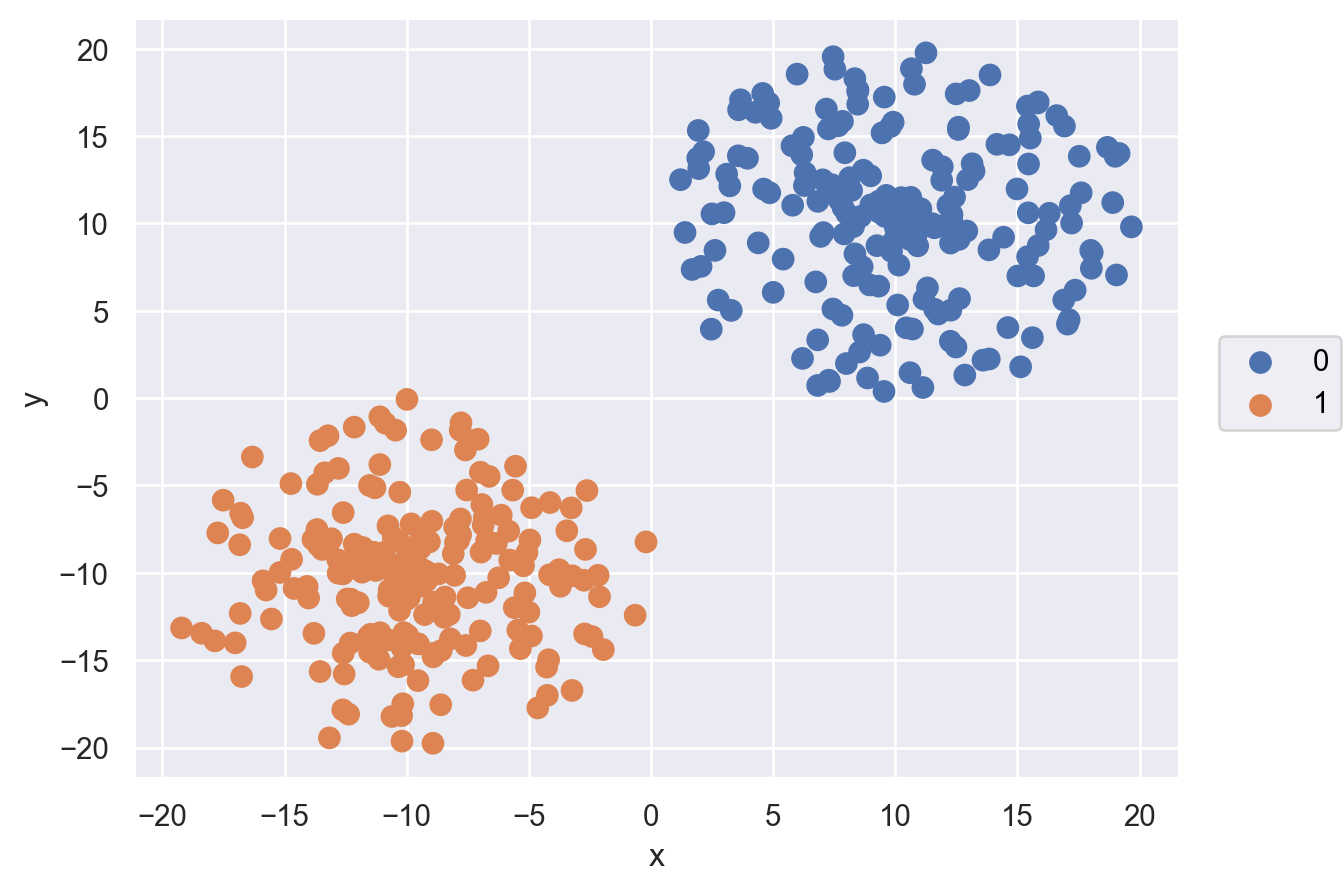

In [6]:
kmeans = KMeans(n_clusters=2)  
etiquetas = kmeans.fit_predict(data2)

(
    so.Plot(data = data2, x = "x", y =  "y", color = etiquetas.astype(str))
    .add(so.Dot(pointsize = 8))
)

4. Consideremos el dataset de datos arti ciales p7-dataSinEscalar.csv.

 (a) Cargar los datos y grafcarlos.

 (b) A priori y mirando el gra co, determine la cantidad de clusters que puede detectar en los
 mismos e imagine inicialmente como debieran ser esos clusters.
 
 (c) Realizar un clustering k-medias con el valor de k antes determinado.

In [7]:
data3 = pd.read_csv(Dir + 'p7-dataSinEscalar.csv')
data3.head()

,x,y
0,0.002501,6488.26703
1,-0.026980,2521.94722
2,-0.029001,3068.77291
3,0.007030,4314.27482
4,-0.025356,2384.49945


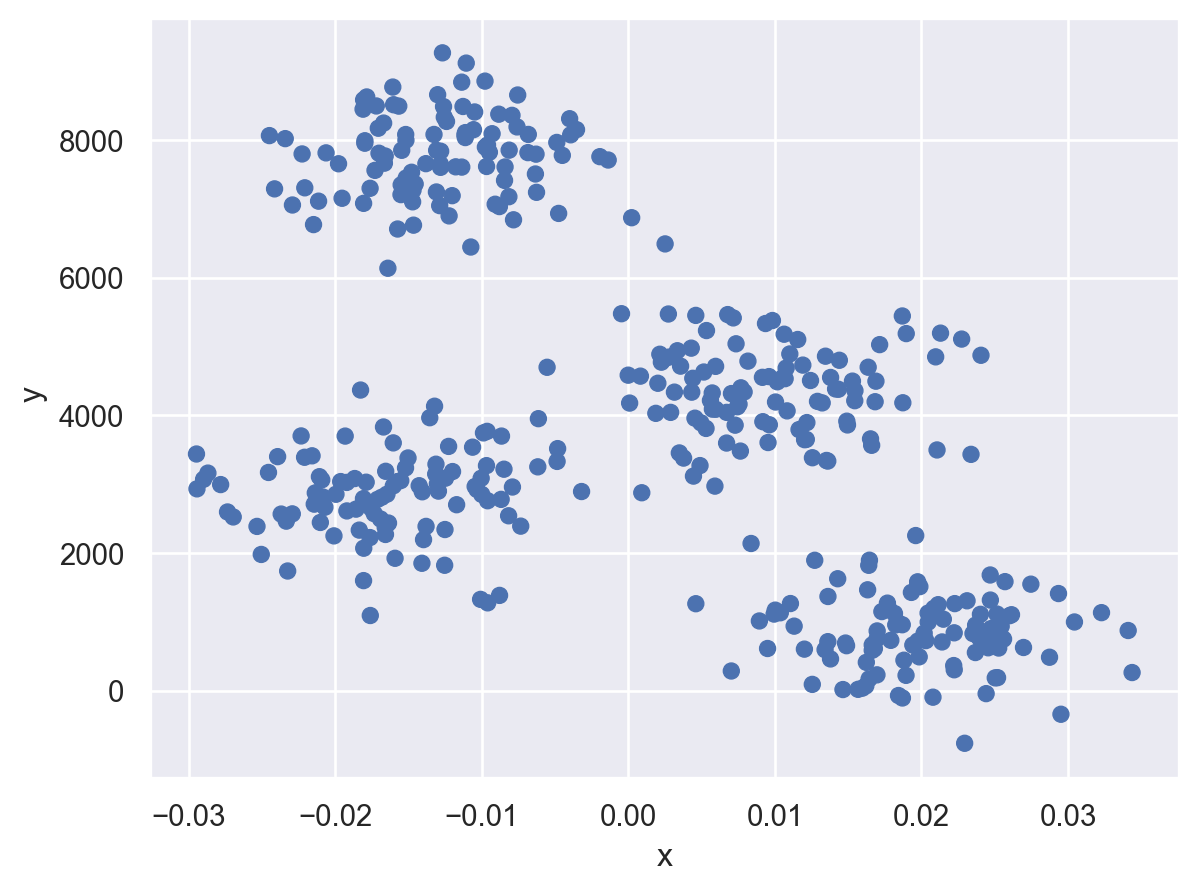

In [8]:
(
    so.Plot(data= data3, x= "x", y= " y")
    .add(so.Dot())
)

c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


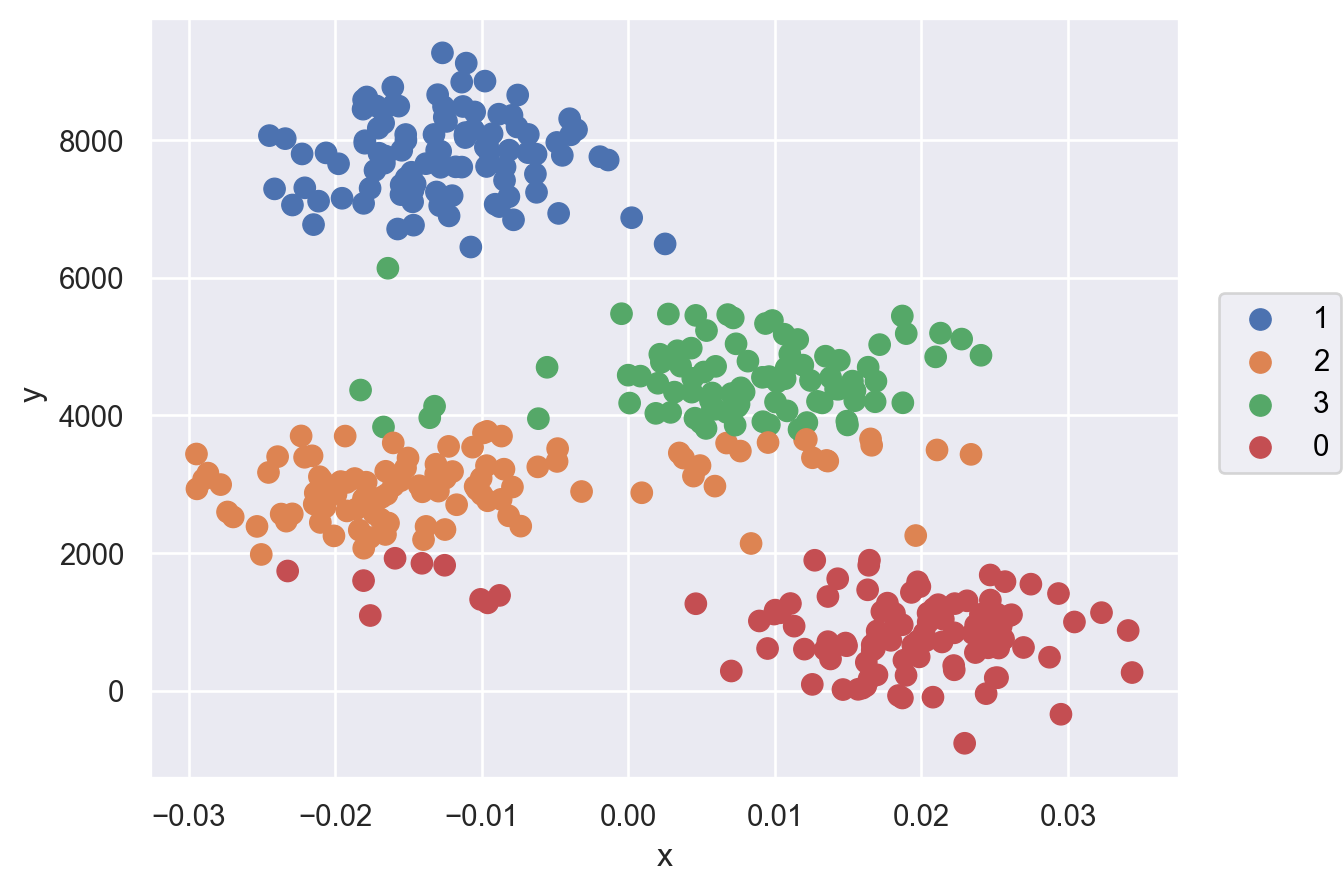

In [9]:
kmeans = KMeans(n_clusters= 4)
etiquetas = kmeans.fit_predict(data3)

(
    so.Plot(data = data3, x= "x", y=" y", color= etiquetas.astype(str))
    .add(so.Dot(pointsize= 8))
)

 (e) Uno de los problemas que tenemos es que el metodo de k-medias es muy sensible a las
 diferencias de escala entre las dimensiones. Una forma de corregir eso es re-escalando las
 variables de forma tal que todas se muevan en el mismo rango.

 

In [10]:
data3[["x", " y"]] = MinMaxScaler().fit_transform(data3[["x", " y"]])

c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


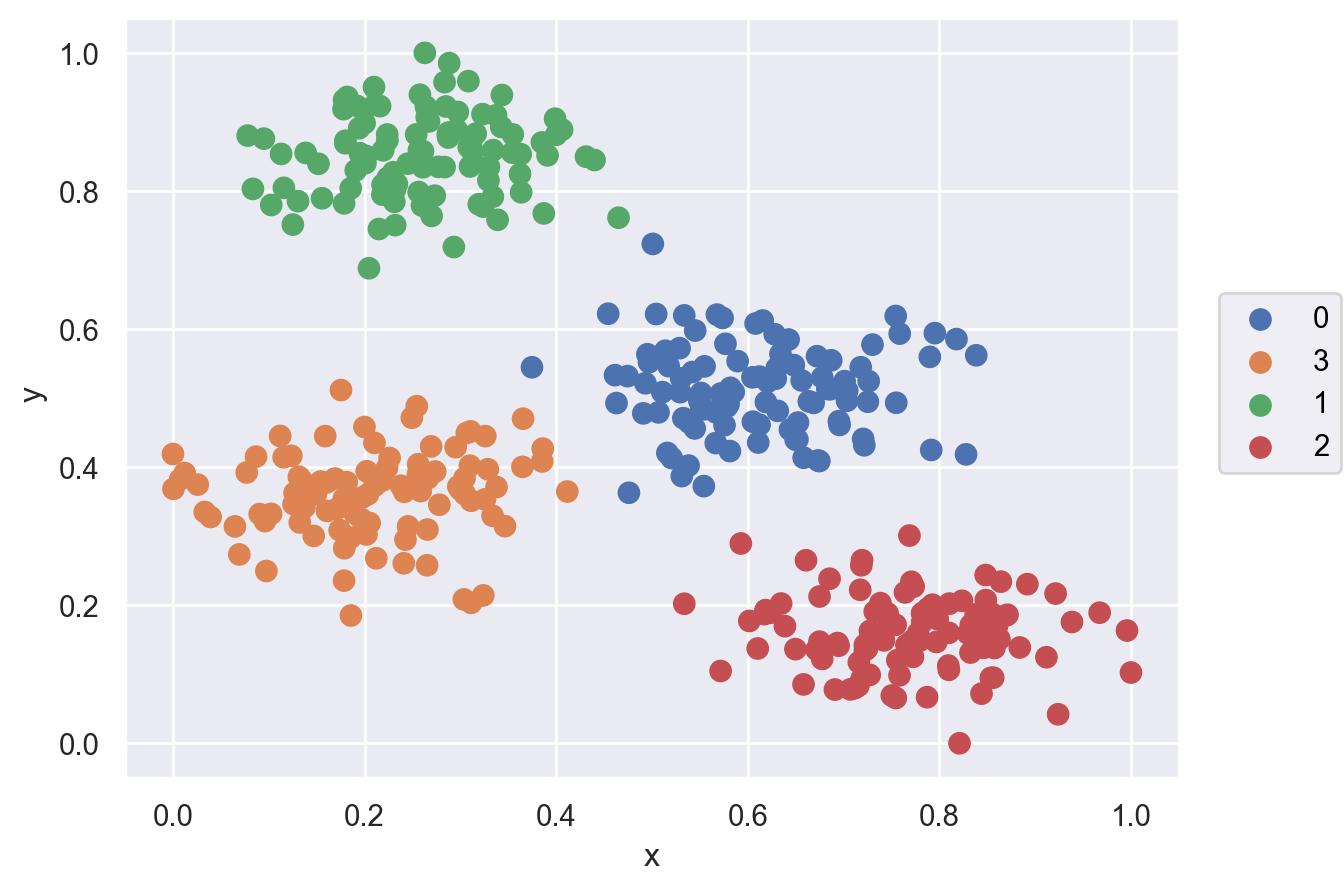

In [11]:
kmeans = KMeans(n_clusters= 4)
etiquetas = kmeans.fit_predict(data3)

(
    so.Plot(data = data3, x= "x", y=" y", color= etiquetas.astype(str))
    .add(so.Dot(pointsize= 8))
)

5. (opcional) Implementar el algoritmo DBSCAN para analizar los sets de datos anteriores. Com
parar los resultados con los obtenidos usando k-medias.

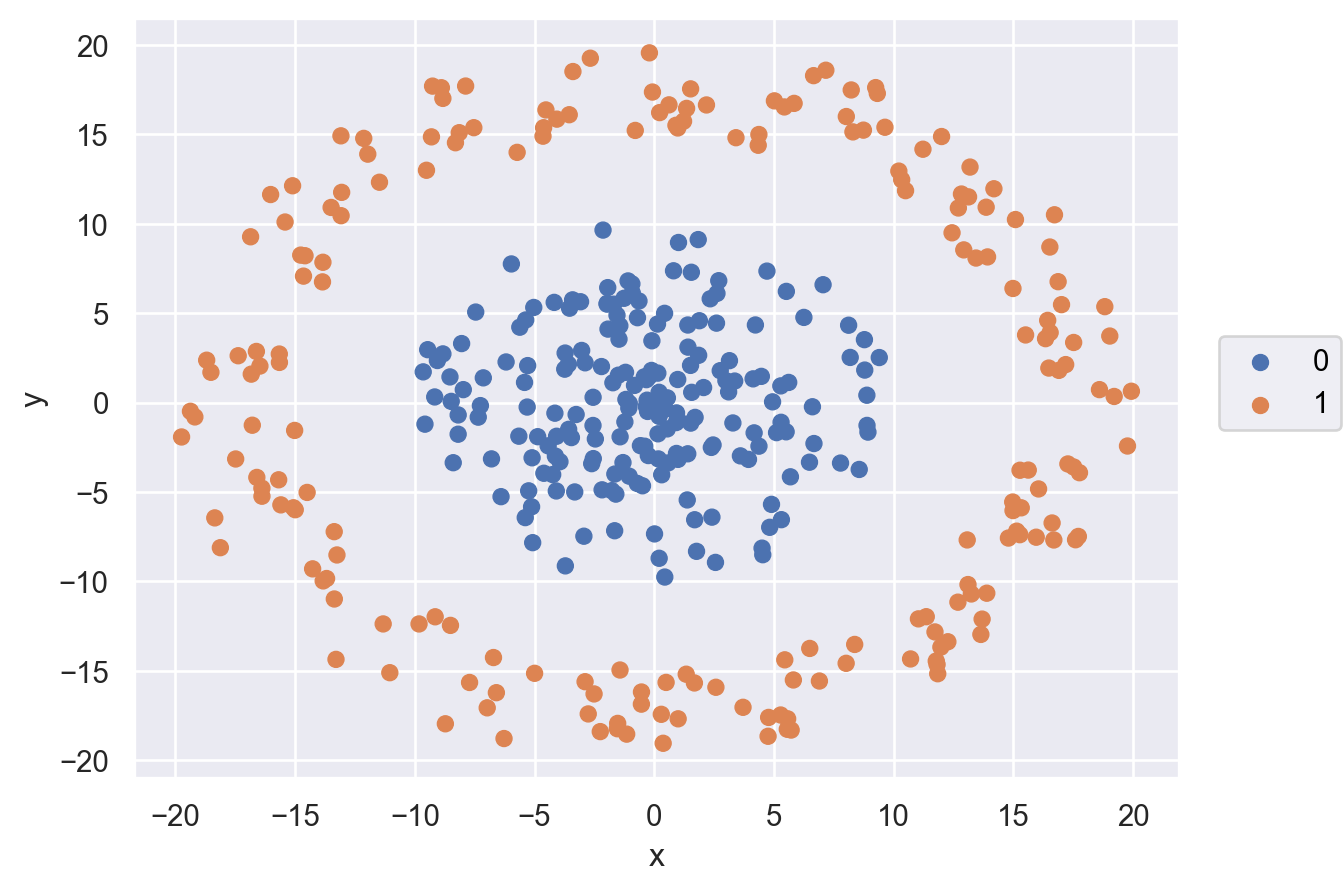

In [12]:
clustering = DBSCAN(eps=4, min_samples=4)
etiqueta = clustering.fit_predict(data1)

# Graficamos
(
    so.Plot(data = data1, x = "x", y = "y", color = etiqueta.astype("str"))
    .add(so.Dot())
)

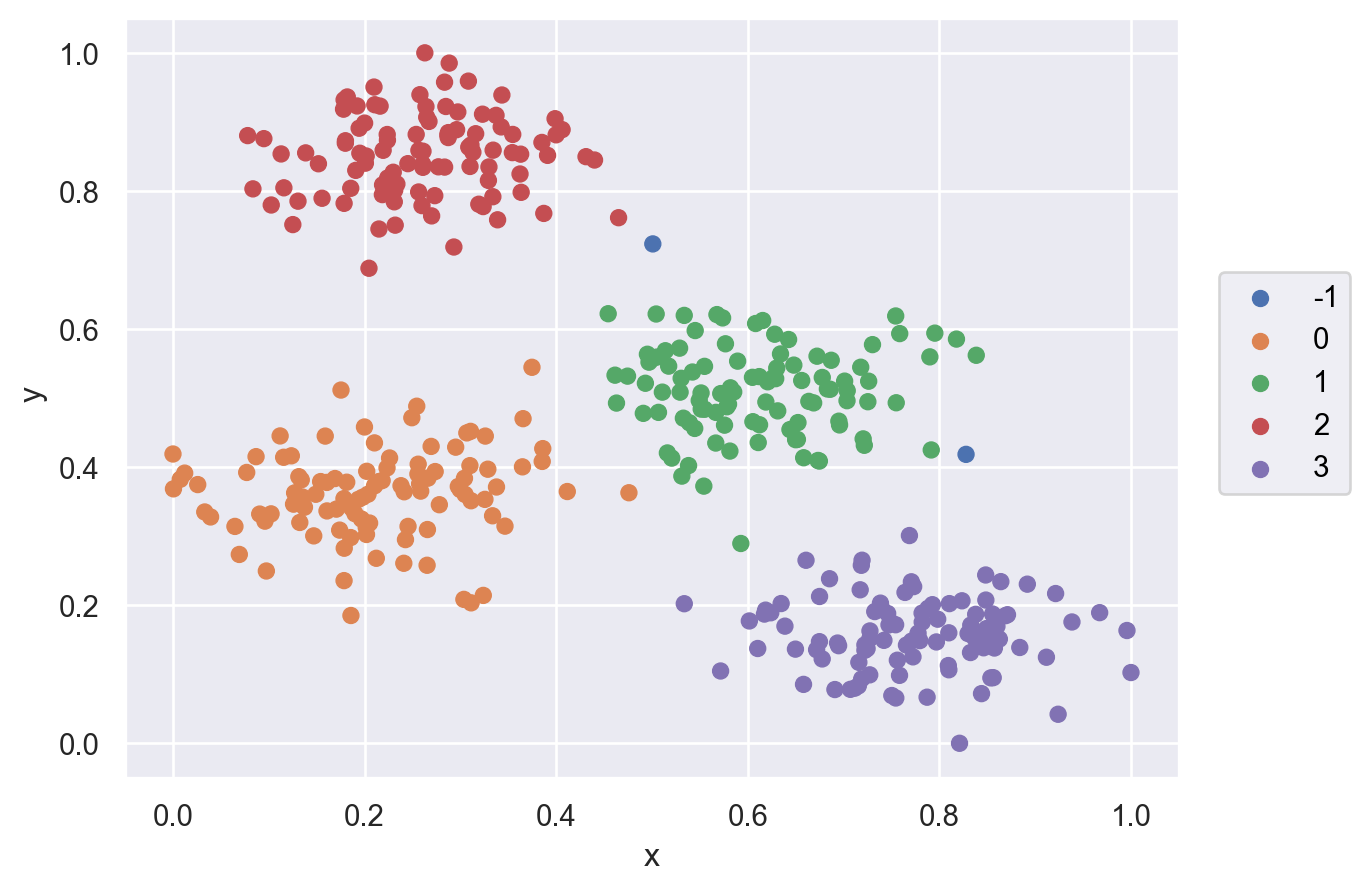

In [13]:
clustering = DBSCAN(eps = 0.1, min_samples= 8)
etiqueta = clustering.fit_predict(data3)

(
    so.Plot(data = data3, x= "x", y= " y", color= etiqueta.astype(str))
    .add(so.Dot())
)

 6. Implementar un clasi cador de k-NN que prediga el sexo de los pinguinos utilizando como
 variables a el largo del pico y el largo de la aleta. Hacerlo para diferentes valores de k (impares)
 y evaluar el error de prediccion en cada caso. Como elegira el valor de k optimo?

In [14]:
penguins = sns.load_dataset("penguins")

In [15]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [16]:
penguinsNumbers = penguins.drop(["species","island"], axis= 1)

In [17]:
penguinsClean = penguinsNumbers.dropna()

In [18]:
# 2. Separamos la variable respuesta
X = penguinsClean.drop("sex", axis= 1)
y = penguinsClean["sex"]

# 3. Escalamos X
X[["bill_length_mm", " flipper_length_mm"]] = MinMaxScaler().fit_transform(X[["bill_length_mm", "flipper_length_mm"]])
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,flipper_length_mm
0,0.254545,18.7,181.0,3750.0,0.152542
1,0.269091,17.4,186.0,3800.0,0.237288
2,0.298182,18.0,195.0,3250.0,0.389831
4,0.167273,19.3,193.0,3450.0,0.355932
5,0.261818,20.6,190.0,3650.0,0.305085
...,...,...,...,...,...
338,0.549091,13.7,214.0,4925.0,0.711864
340,0.534545,14.3,215.0,4850.0,0.728814
341,0.665455,15.7,222.0,5750.0,0.847458
342,0.476364,14.8,212.0,5200.0,0.677966


In [42]:
neighbor = KNeighborsClassifier(n_neighbors=8)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [44]:
neighbor.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [45]:
y_pred = neighbor.predict(X_test)
y_pred

array(['Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female',
       'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female',
       'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Female', 'Female'], dtype=object)

In [46]:
print(accuracy_score(y_test,y_pred))

0.8208955223880597


In [49]:
for K in range(1,30,2):
    neighbor = KNeighborsClassifier(n_neighbors=K)
    neighbor.fit(X_train,y_train)
    y_pred = neighbor.predict(X_test)
    print(K, accuracy_score(y_test,y_pred))

1 0.8059701492537313
3 0.7313432835820896
5 0.7761194029850746
7 0.7761194029850746
9 0.835820895522388
11 0.8656716417910447
13 0.8507462686567164
15 0.8208955223880597
17 0.8059701492537313
19 0.8059701492537313
21 0.7910447761194029
23 0.8059701492537313
25 0.8059701492537313
27 0.8059701492537313
29 0.8208955223880597
